In [1]:
from analysis import *

%matplotlib inline

In [ ]:
## Generate the ripple schematic for pt1 trial 298
tg_handler = pt_handler("pt_1")
data = tg_handler.construct_trial(298,tg_handler.summary_data[0],0)

In [ ]:
fig = tg_handler.display_env(*data)
fig.savefig("../pres_figs/tg_trial_298.pdf")
fig.savefig("../pres_figs/tg_trial_298.eps")


data_max = 27.0


100%|██████████| 51/51 [03:54<00:00,  4.60s/it]


data_max = 27.0


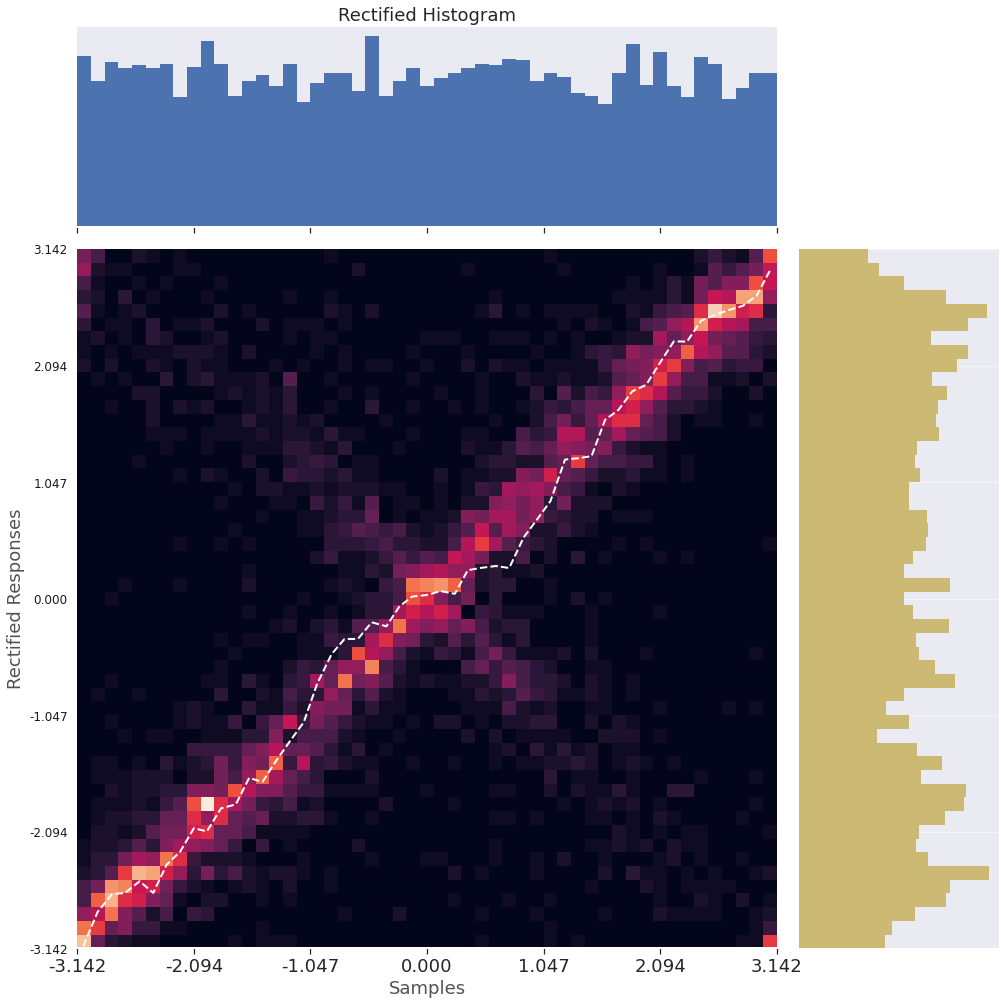

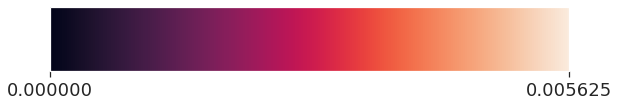

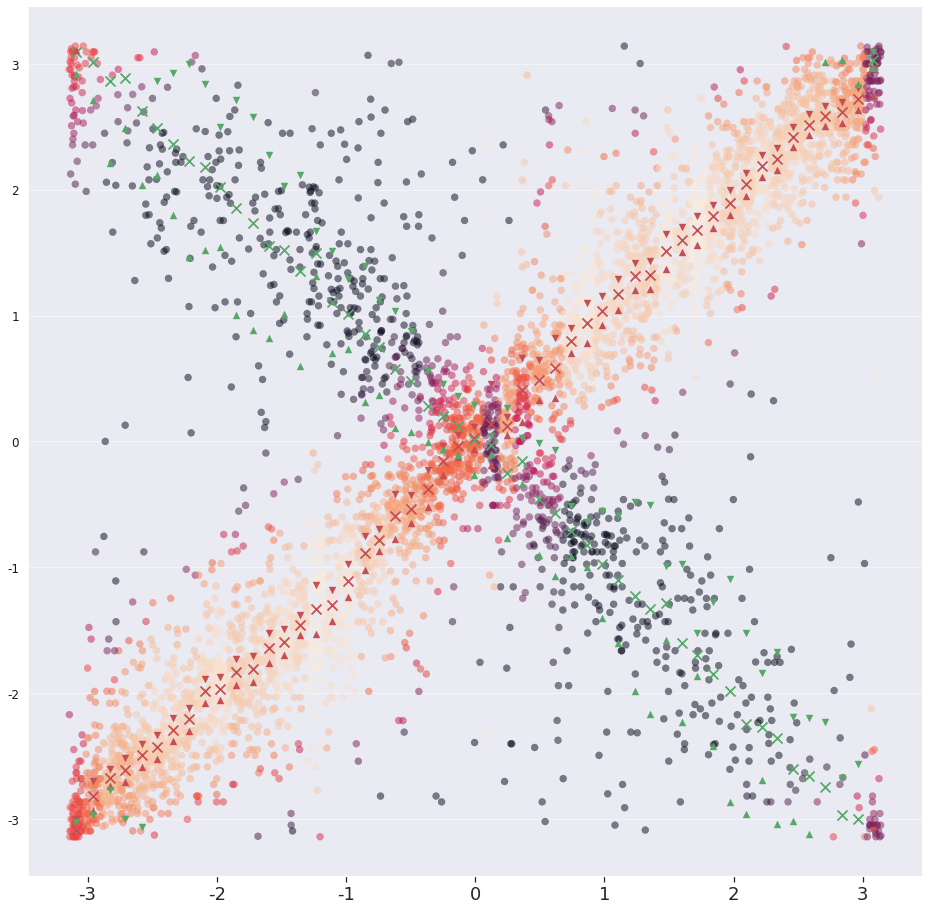

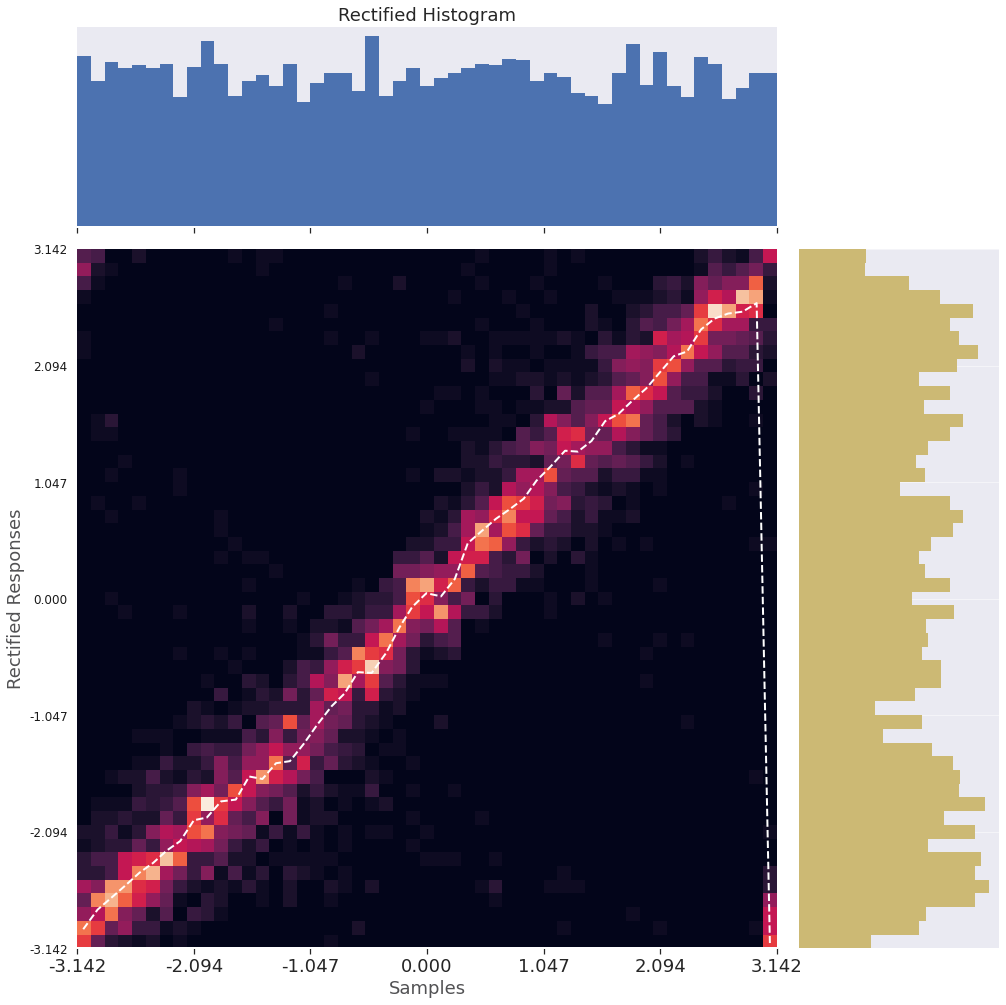

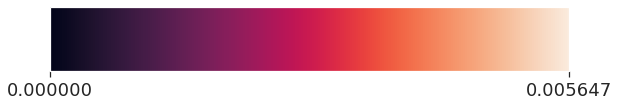

In [6]:
all_data = total_handler()
df = all_data.get_all_df(reject=  ["Mattias"])
fig,col_bar = all_data.alt_hist_results(df["SampleDensity"].to_numpy(),df["EndMatchDensity"].to_numpy(),"Samples","Rectified Responses","Rectified Histogram",num_bins = 51)
fig.savefig("../pres_figs/raw_histogram.eps")
col_bar.savefig("../pres_figs/raw_histogram_colbar.eps")
samps  = df["SampleDensity"].to_numpy() / 1.7 * jnp.pi
resps  = df["EndMatchDensity"].to_numpy() / 1.7 * jnp.pi
fig,_,resp = all_data.fit_posterior(resps,samps,num_bins = 51)
fig.savefig("fit_posteriors.png")
resps = resp / jnp.pi * 1.7
fig,col_bar = all_data.alt_hist_results(df["SampleDensity"].to_numpy(),resps,"Samples","Rectified Responses","Rectified Histogram",num_bins = 51)
fig.savefig("../pres_figs/Rectified_histogram_tight_mean_prior.eps")
col_bar.savefig("../pres_figs/Rectified_histogram_tight_mean_prior_col_bar.eps")

In [3]:
df["EndMatchDensity"] = resps

100%|██████████| 500/500 [00:27<00:00, 18.28it/s]


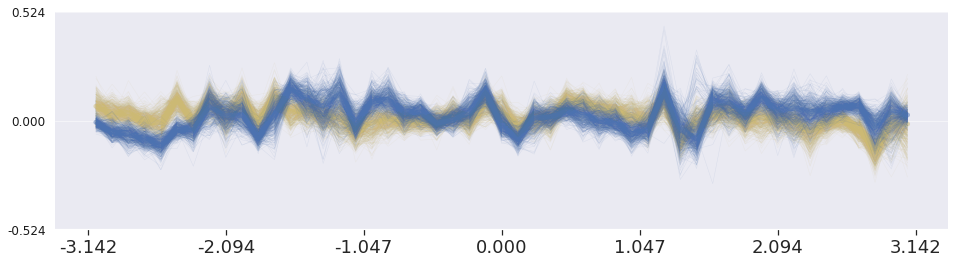

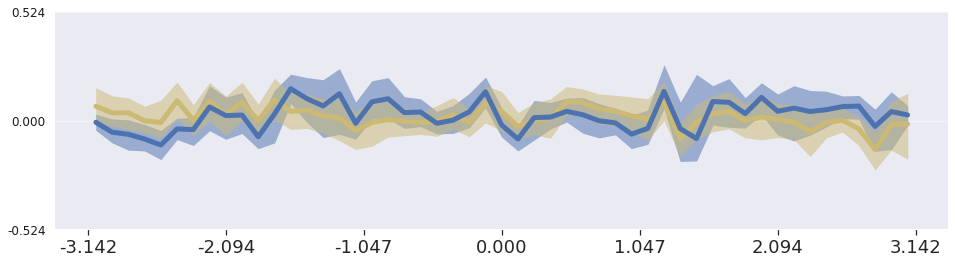

In [4]:
row_means,means,row_modes,modes,row_vals = all_data.get_bootstraps(df,cycles=500,kernel=20)
_,fig = all_data.disp_bootstrap(row_means,means,row_modes,modes,0.05,row_vals)
fig.savefig("bootstrap_decision.png")
fig.savefig("bootstrap_decision.eps")


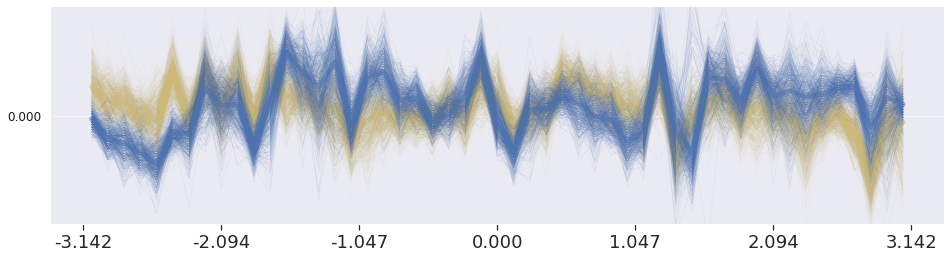

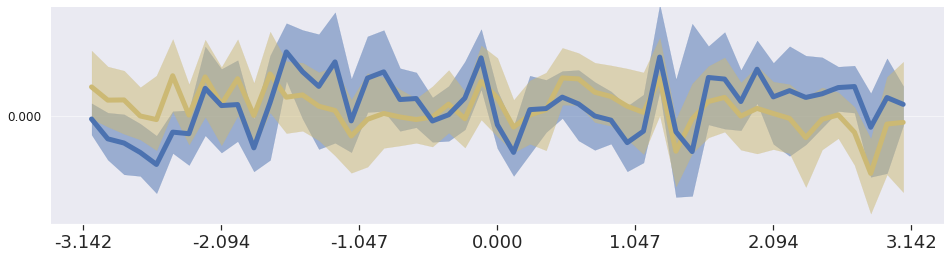

In [7]:
_,fig = all_data.disp_bootstrap(row_means,means,row_modes,modes,0.05,row_vals,limit=[-jnp.pi/12,jnp.pi/12])
fig.savefig("bootstrap_decision.png")
fig.savefig("bootstrap_decision.eps")

100%|██████████| 1000/1000 [00:07<00:00, 141.49it/s]


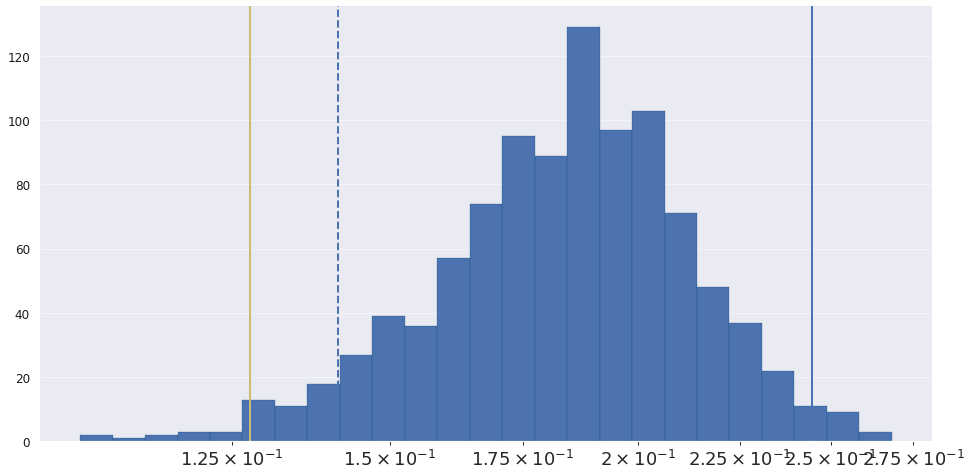

In [5]:
fig = all_data.comp_mean_mode(means,modes,permutes = 1000)
fig.savefig("Dec_comparison.png")
fig.savefig("Dec_comparison.eps")